In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
%matplotlib inline

In [17]:
rent_new = pd.read_csv('Desktop/house_rental_dataUC(revised).csv')
rent_new.head()

,Unnamed: 0,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1,1177.698,2,7,2,2,2,62000
1,2,2134.800,5,7,4,2,2,78000
2,3,1138.560,5,7,2,2,1,58000
3,4,1458.780,2,7,3,2,2,45000
4,5,967.776,11,14,3,2,2,45000


In [18]:
rent_new = rent_new.drop(['Unnamed: 0'], axis=1)
rent_new.head()

,Sqft,Floor,TotalFloor,Bedroom,Living.Room,Bathroom,Price
0,1177.698,2,7,2,2,2,62000
1,2134.800,5,7,4,2,2,78000
2,1138.560,5,7,2,2,1,58000
3,1458.780,2,7,3,2,2,45000
4,967.776,11,14,3,2,2,45000


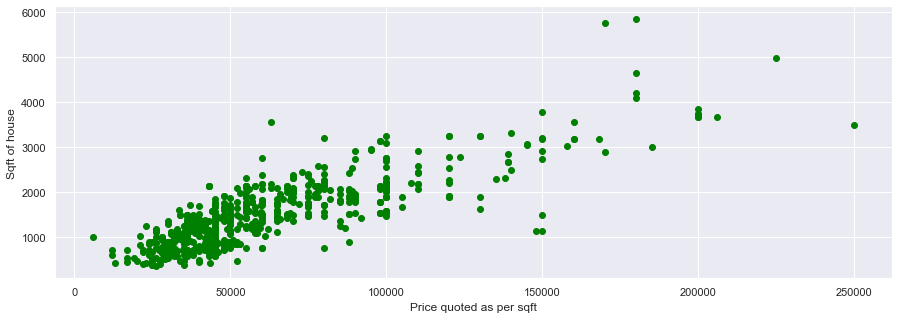

In [19]:
plt.figure(figsize = (15,5))
plt.scatter(rent_new['Price'], rent_new['Sqft'], c = 'green')
plt.xlabel ("Price quoted as per sqft")
plt.ylabel("Sqft of house")
plt.show()

In [20]:
x = rent_new ['Price'].values.reshape(-1,1)
y = rent_new ['Sqft'].values.reshape(-1,1)

In [21]:
x

array([[ 62000],
       [ 78000],
       [ 58000],
       [ 45000],
       [ 45000],
       [148000],
       [ 58000],
       [ 48000],
       [ 45000],
       [ 65000],
       [ 31000],
       [ 29002],
       [ 39000],
       [ 48000],
       [ 55000],
       [100000],
       [ 48000],
       [ 25000],
       [ 90000],
       [ 33000],
       [140000],
       [100000],
       [ 55000],
       [105000],
       [200000],
       [ 98000],
       [200000],
       [145000],
       [ 25000],
       [ 24028],
       [ 65000],
       [ 85000],
       [ 55000],
       [ 57000],
       [ 46000],
       [ 52000],
       [ 43500],
       [ 60000],
       [200000],
       [ 36000],
       [145000],
       [ 48000],
       [ 36000],
       [ 65000],
       [ 70000],
       [ 50000],
       [ 47999],
       [ 80000],
       [200000],
       [ 24030],
       [ 76000],
       [ 70000],
       [ 32500],
       [ 30032],
       [180000],
       [ 80000],
       [ 36000],
       [ 36000],
       [ 29032

In [22]:
y

array([[1177.698],
       [2134.8  ],
       [1138.56 ],
       [1458.78 ],
       [ 967.776],
       [1127.886],
       [1352.04 ],
       [ 757.854],
       [1152.792],
       [1423.2  ],
       [ 668.904],
       [ 711.6  ],
       [1352.04 ],
       [ 818.34 ],
       [2134.8  ],
       [2768.124],
       [ 711.6  ],
       [ 462.54 ],
       [2739.66 ],
       [1174.14 ],
       [2490.6  ],
       [2768.124],
       [ 747.18 ],
       [1668.702],
       [3664.74 ],
       [1779.   ],
       [3664.74 ],
       [3059.88 ],
       [ 533.7  ],
       [ 853.92 ],
       [1732.746],
       [1245.3  ],
       [2134.8  ],
       [1206.162],
       [ 861.036],
       [ 462.54 ],
       [ 434.076],
       [ 768.528],
       [3735.9  ],
       [ 889.5  ],
       [3063.438],
       [ 925.08 ],
       [1174.14 ],
       [1352.04 ],
       [1771.884],
       [1601.1  ],
       [1487.244],
       [2277.12 ],
       [3735.9  ],
       [ 711.6  ],
       [2241.54 ],
       [1494.36 ],
       [ 711

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)
#20% test &80% train

In [25]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(516, 1)
(129, 1)
(516, 1)
(129, 1)


In [26]:
from sklearn.linear_model import LinearRegression

In [27]:
reg = LinearRegression()

In [28]:
reg.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
print(reg.coef_[0][0])
print(reg.intercept_[0])

0.017449957888926684
437.2010032632852


In [30]:
print("The model is: Price = {:.5} + {:.5}(Sqft)".format(reg.intercept_[0], reg.coef_[0][0]))

The model is: Price = 437.2 + 0.01745(Sqft)


In [31]:
predictions = reg.predict(x_test)

In [32]:
house_new = pd.DataFrame({'Actual' : y_test.flatten(), 'Predicitions' : predictions.flatten()})
house_new

,Actual,Predicitions
0,2561.760,2182.196792
1,996.240,925.799824
2,1700.724,1396.948687
3,2138.358,1187.549192
4,665.346,873.449950
...,...,...
124,448.308,733.850287
125,2006.712,1623.798140
126,3024.300,3194.294350
127,861.036,1239.899066


<function matplotlib.pyplot.show(*args, **kw)>

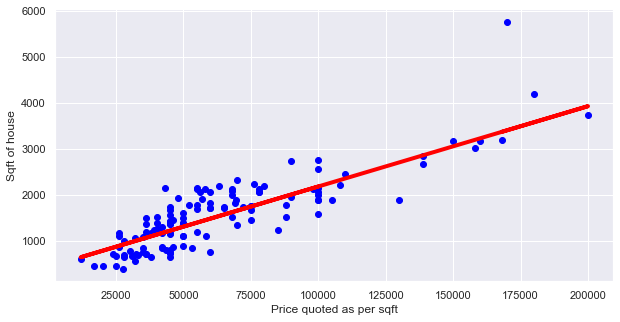

In [33]:
plt.figure(figsize = (10,5))
plt.scatter(x_test, y_test, c = 'blue')
plt.plot(x_test, predictions, c = 'red', linewidth = 4)
plt.xlabel ("Price quoted as per sqft")
plt.ylabel("Sqft of house")
plt.show

In [34]:
from sklearn import metrics

In [35]:
metrics.mean_squared_error (y_test, predictions)

173436.81873493805

In [36]:
np.sqrt(metrics.mean_squared_error(y_test, predictions))

416.45746329599865

In [37]:
from sklearn.metrics import r2_score

In [38]:
coefficient_of_dermination = r2_score(y_test, predictions)

In [39]:
coefficient_of_dermination

0.7266900322613126

In [40]:
import statsmodels.api as sm

In [43]:
X= rent_new['Sqft']
Y= rent_new['Price']

In [44]:
X2= sm.add_constant(X)
X2

,const,Sqft
0,1.0,1177.698
1,1.0,2134.800
2,1.0,1138.560
3,1.0,1458.780
4,1.0,967.776
...,...,...
640,1.0,1359.156
641,1.0,377.148
642,1.0,740.064
643,1.0,1707.840


In [45]:
sm_reg = sm.OLS(Y, X2)
sm_fit = sm_reg.fit()
print(sm_fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     1376.
Date:                Mon, 31 Aug 2020   Prob (F-statistic):          6.95e-162
Time:                        21:40:05   Log-Likelihood:                -7306.1
No. Observations:                 645   AIC:                         1.462e+04
Df Residuals:                     643   BIC:                         1.463e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3425.1332   1766.646      1.939      0.0

In [46]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


In [47]:
from yellowbrick.regressor import ResidualsPlot

C:\Users\Raja\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


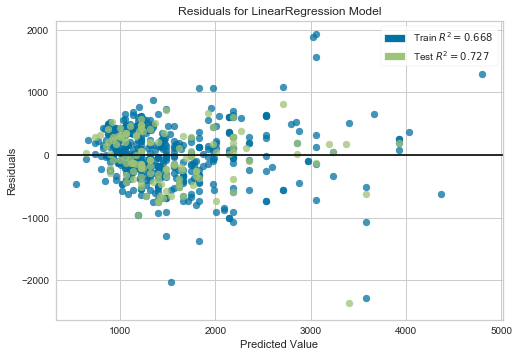

In [48]:
visualizer = ResidualsPlot(reg, hist=False)
visualizer.fit(x_train, y_train)
visualizer.score(x_test, y_test)
visualizer.show()

In [49]:
from sklearn.linear_model import Ridge

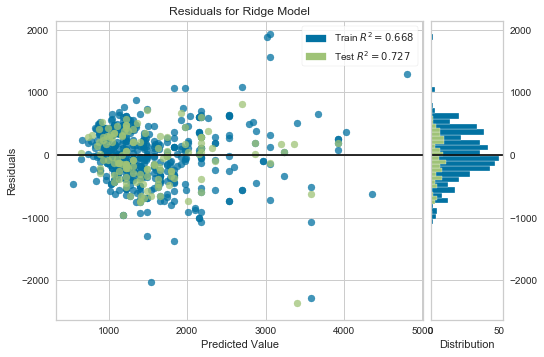

In [50]:
reg = Ridge()
visualizer = ResidualsPlot(reg)
visualizer.fit(x_train, y_train)  
visualizer.score(x_test, y_test)  
visualizer.show()

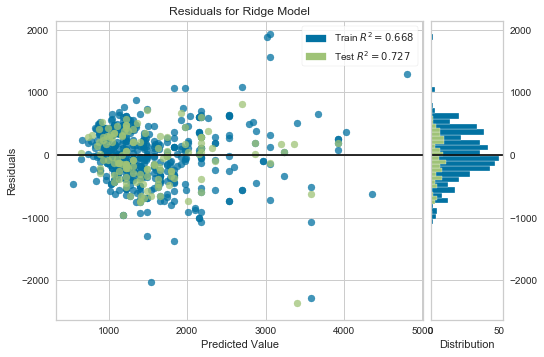

In [51]:
reg = ResidualsPlot(Ridge())
reg.fit(x_train, y_train)
reg.score(x_test, y_test)
reg.show()

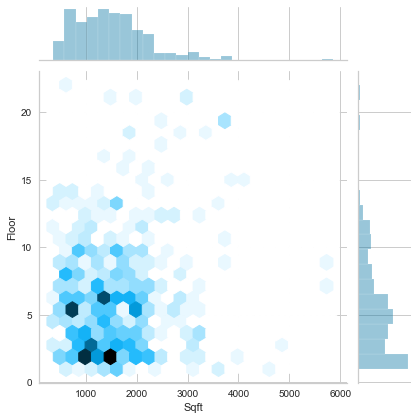

In [54]:
sns.jointplot(x=rent_new['Sqft'], y=rent_new['Floor'], kind="hex")

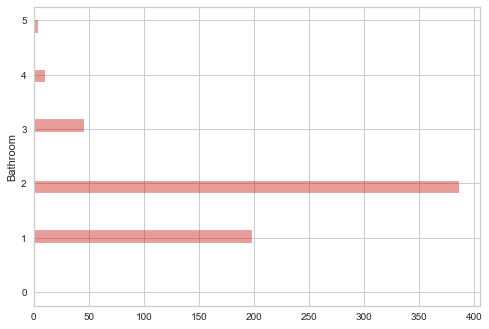

In [55]:
sns.distplot(rent_new['Bathroom'], kde=False, vertical=True, color ='r')

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


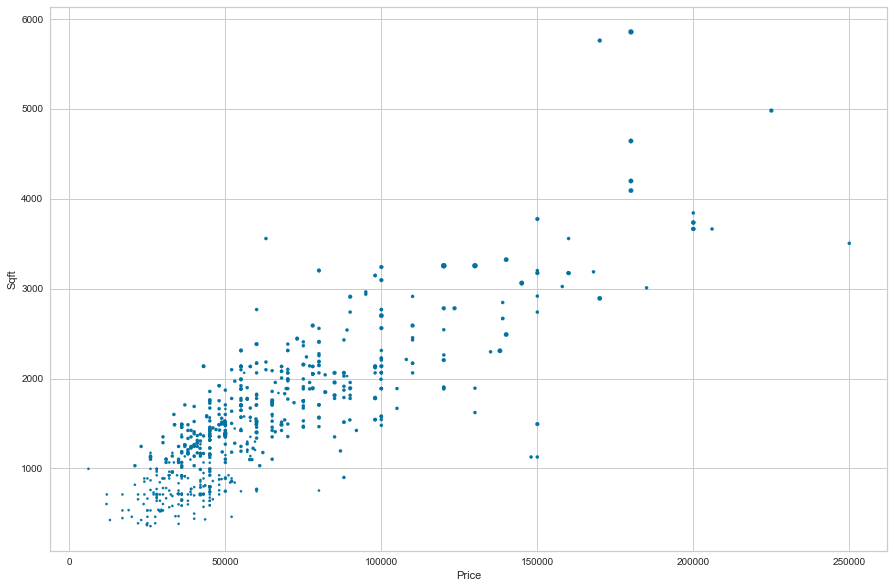

In [56]:
rent_new.plot(kind='scatter', x= 'Price', y= 'Sqft', s = rent_new['Bathroom']*5, figsize = (15,10))